# Brownian Motion

1.) $B_0=0$

2.) $B$ has stationary and indepent increments

3.) $B_t-B_s\sim N(0,t-s)$ with $0<s<t$

(Discrete sense)

Suppose we had time increments $0=t_0<t_1<\dots <t_k=T$
- $B_{t_0}=B_0=0$
- $B_{t_1}=B_0+B_{t_1}-B_{t_0}$
- $B_{t_2}=B_{t_0}+B_{t_2}-B_{t_1}$
- (generally) $B_{t_i}=B_{t_{i-2}}+B_{t_i}-B_{t_{i-1}}, i \in \mathbb{N}$

Suppose we had a standard normal viarable $Z\sim N(0,1)$ and first index of a Brownian motion given by $B_{t_1}=B_0+B_{t_1}-B_{t_0}=0+B_{t_1}-B_{t_0}\sim N(0,t_1)$
If we are to scale $Z$ by $\sqrt{t_1}$ it follows $B_{t_1}=\sqrt{t_1}Z$ in the sense that have the same distribution function.

We know that any shift/scale (by some constants $a,b\in\mathbb{R}$ normal random variable is also normal, thus we can look for the expectation and varaince.

- $\mathbb{E}(\sqrt{t_1}Z)=\sqrt{t_1}\mathbb{E}(Z)=0$
- $Var(\sqrt{t_1}Z)=t_1Var(Z)=t_1$
$\implies \sqrt{t_1}Z \sim N(0,t_1) \implies \sqrt{t_1}Z_{t_1}=B_{t_1}$

Simulation Brownian motions
- $B_{t_0}=B_0=0$
- $B_{t_1}=\sqrt{t_1}Z_{t_1}$
- $B_{t_2}=\sqrt{t_1}Z_{t_1}+\sqrt{t_2-t_1}Z_{t_2}$
- $B_{t_i}=B_{t_{i-2}}+B_{t_i}-B_{t_{i-1}}=\Sigma_{i=1}^k\sqrt{t_i-t_{i-1}}Z_{t_i}$

Suppose we have another standard normal random variable $Z_{t_2} \sim N(0,1)$ we know $B_{t_2}-B_{t_1} \sim N(0,t_2-t_1)$

If we scale $Z_{t_2}$ by $\sqrt{t_2-t_1}$ we will find $\sqrt{t_2-t_1}Z_{t_2}=B_{t_2}-B_{t_1}$ in the sense of their distribution functions.

## Simulation in 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def quadratic_variation1D(X):
    return np.cumsum(np.power(np.diff(X, axis=0, prepend=0.), 2), axis=0)

In [3]:
def displacement1D():
    n = 10000 # number of steps
    d = 10 # number of Brownian motion (samples)
    T = 1. # time
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = np.sqrt(dt) * np.random.normal(0,1,size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    return times, X

In [4]:
t, X_dis = displacement1D()

Define the MSD fitting function in 1D: $<[\Delta X(t)]^2>= 2Dt$

In [5]:
def msd_function(time, D):
    return 2 * D * time

params, covariance = curve_fit(msd_function, t, quadratic_variation1D(X_dis)[:,0])
D = params[0]

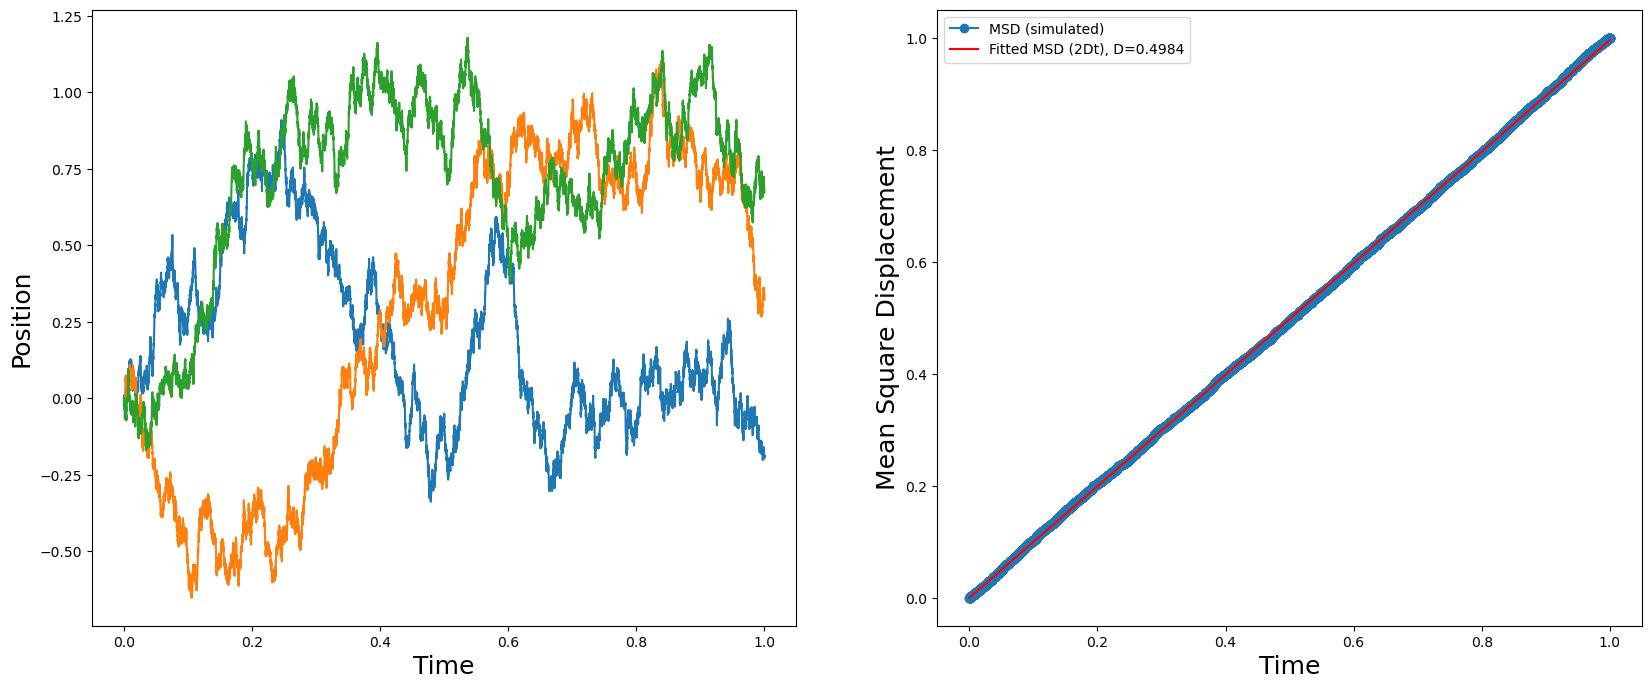

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
ax1.plot(t, X_dis[:,:3], label='Particle trajectory')
ax2.plot(t, quadratic_variation1D(X_dis)[:,0], label='MSD (simulated)', marker='o')
ax2.plot(t, msd_function(t, D), label=f'Fitted MSD (2Dt), D={D:.4f}', color='red')
ax1.set_xlabel("Time", fontsize = 18)
ax2.set_xlabel("Time", fontsize = 18)
ax1.set_ylabel("Position", fontsize = 18)
ax2.set_ylabel("Mean Square Displacement", fontsize = 18)
plt.legend()
plt.show()

## Simulation in 2D

In [7]:
def quadratic_variation2D(X,Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.),2) + np.power(np.diff(Y, axis=0, prepend=0.),2)
    return np.cumsum(msd2D, axis=0)

In [8]:
def displacement2D():
    n = 10000 # number of steps
    d = 10 # number of Brownian motion (samples)
    T = 1. # time
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = np.sqrt(dt) * np.random.normal(0,1,size=(n-1, d))
    dY = np.sqrt(dt) * np.random.normal(0,1,size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    Y = np.concatenate((X_0, np.cumsum(dY, axis=0)), axis=0)
    return times, X, Y

In [9]:
t2, X_disp, Y_disp = displacement2D()

Define the MSD fitting function in 2D: $<[\Delta \vec{r}(t)]^2>= 4Dt$

In [10]:
def msd_function2D(time, D):
    return 4 * D * time

params, covariance = curve_fit(msd_function2D, t2, quadratic_variation2D(X_disp, Y_disp)[:,0])
D = params[0]

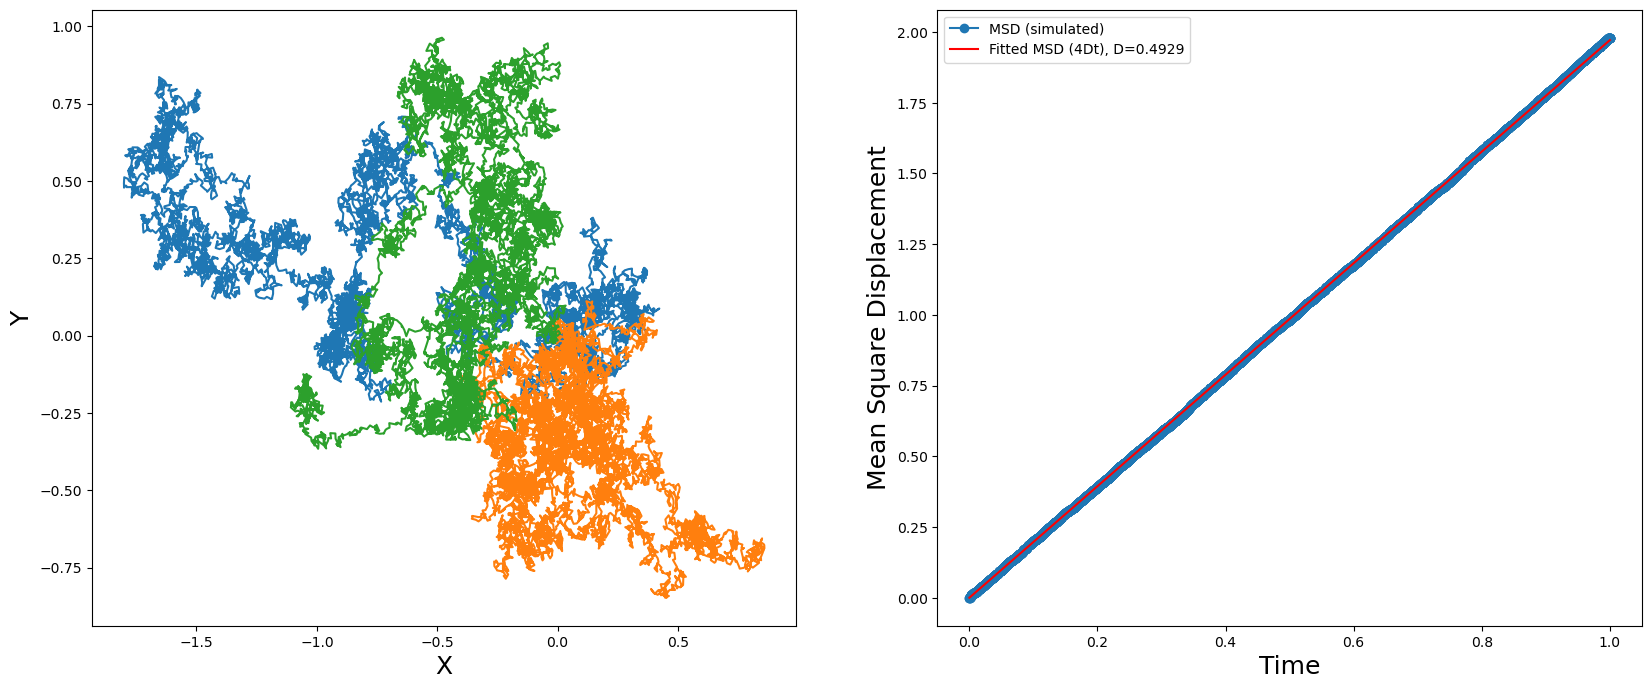

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
ax1.plot(X_disp[:,:3], Y_disp[:,:3], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:,0], label='MSD (simulated)', marker='o')
ax2.plot(t2, msd_function2D(t, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize = 18)
ax2.set_xlabel("Time", fontsize = 18)
ax1.set_ylabel("Y", fontsize = 18)
ax2.set_ylabel("Mean Square Displacement", fontsize = 18)
#ax2.set_xscale('log')
#ax2.set_yscale('log')
plt.legend()
plt.show()

# Active Brownian Particle (ABP) in 2D

## Fist code

In [12]:
def quadratic_variation2D(X, Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.), 2) + np.power(np.diff(Y, axis=0, prepend=0.), 2)
    return np.cumsum(msd2D, axis=0)

In [13]:
def displacement2D_active(velocity=3, direction_changes_prob=1):
    n = 10000  # number of steps
    d = 10  # number of Brownian motion (samples)
    T = 100.  # time
    D_t = 2
    D_r = 170
    times = np.linspace(0., T, n)
    dt = times[1] - times[0]
    
    dX = np.sqrt(2*dt*D_t) * np.random.normal(0, 1, size=(n - 1, d))
    dY = np.sqrt(2*dt*D_t) * np.random.normal(0, 1, size=(n - 1, d))
    
    theta = np.sqrt(2*D_r*dt)*np.random.normal(0, 1, size=d)
    vX = velocity * np.cos(theta)
    vY = velocity * np.sin(theta)
    
    X = np.zeros((n, d))
    Y = np.zeros((n, d))
    
    for i in range(1, n):

        X[i] = X[i - 1] + dX[i - 1] + vX * dt
        Y[i] = Y[i - 1] + dY[i - 1] + vY * dt
        
        if np.random.rand() < direction_changes_prob:
            theta = np.sqrt(2*D_r*dt)*np.random.normal(0, 1, size=d)
            vX = velocity * np.cos(theta)
            vY = velocity * np.sin(theta)
    
    return times, X, Y

In [14]:
t2, X_disp, Y_disp = displacement2D_active()

In [15]:
def msd_function2D(time, D):
    return 4 * D * time

# Fitting the MSD
params, covariance = curve_fit(msd_function2D, t2, quadratic_variation2D(X_disp, Y_disp)[:, 0])
D = params[0]

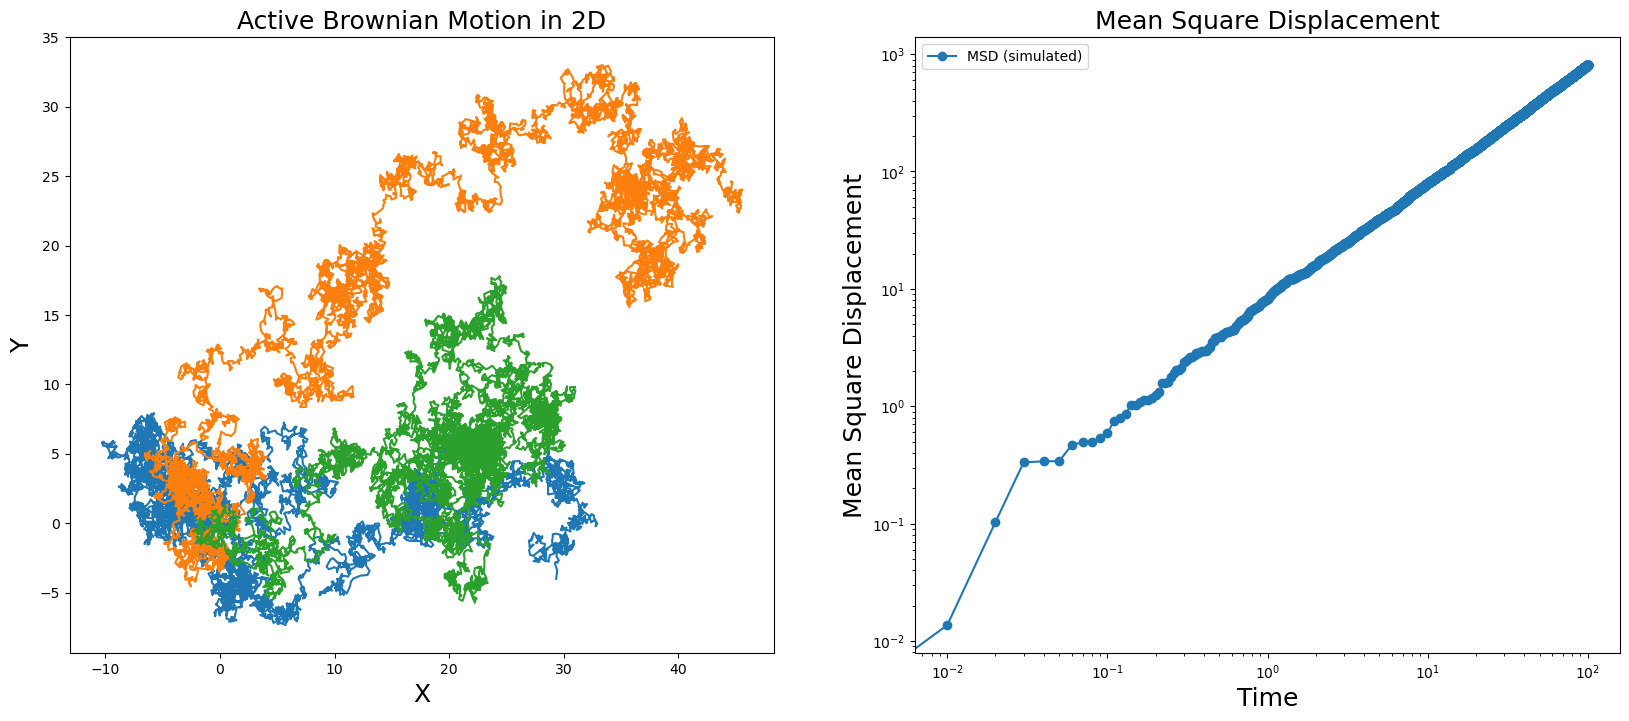

In [16]:
# Plotting the trajectories and MSD
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1.plot(X_disp[:, :3], Y_disp[:, :3], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:, 0], label='MSD (simulated)', marker='o')
#ax2.plot(t2, msd_function2D(t2, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize=18)
ax2.set_xlabel("Time", fontsize=18)
ax1.set_ylabel("Y", fontsize=18)
ax2.set_ylabel("Mean Square Displacement", fontsize=18)
ax1.set_title('Active Brownian Motion in 2D', fontsize=18)
ax2.set_title('Mean Square Displacement', fontsize=18)
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.legend()
plt.show()

## Second Code

In [17]:
def quadratic_variation2D(X,Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.),2) + np.power(np.diff(Y, axis=0, prepend=0.),2)
    return np.cumsum(msd2D, axis=0)

In [18]:
def displacement2D():
    d = 10 # number of Brownian motion (samples)
    D_t = 2
    D_r = 170
    v_0 = 3
    x_0 = np.full(d,0.0)
    y_0 = np.full(d,0.0)
    theta_0 = np.full(d,0.0)
    n = 10000 # number of steps
    T = 100. # time
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    x = np.zeros(shape=(n, d))
    y = np.zeros(shape=(n, d))
    theta = np.zeros(shape=(n, d))
    
    x[0] = x_0
    y[0] = y_0
    theta[0] = theta_0
    
    for i in range(1,n):
        x[i] += v_0*np.cos(theta[i])*dt + np.sqrt(2*D_t*dt) * np.random.normal(0,1,d)
        y[i] += v_0*np.sin(theta[i])*dt + np.sqrt(2*D_t*dt) * np.random.normal(0,1,d)
        theta[i] += np.sqrt(2*D_r*dt)*np.random.normal(0,1,d)   
                
    return times, x, y, theta

In [19]:
t2, X_disp, Y_disp, theta_2 = displacement2D()

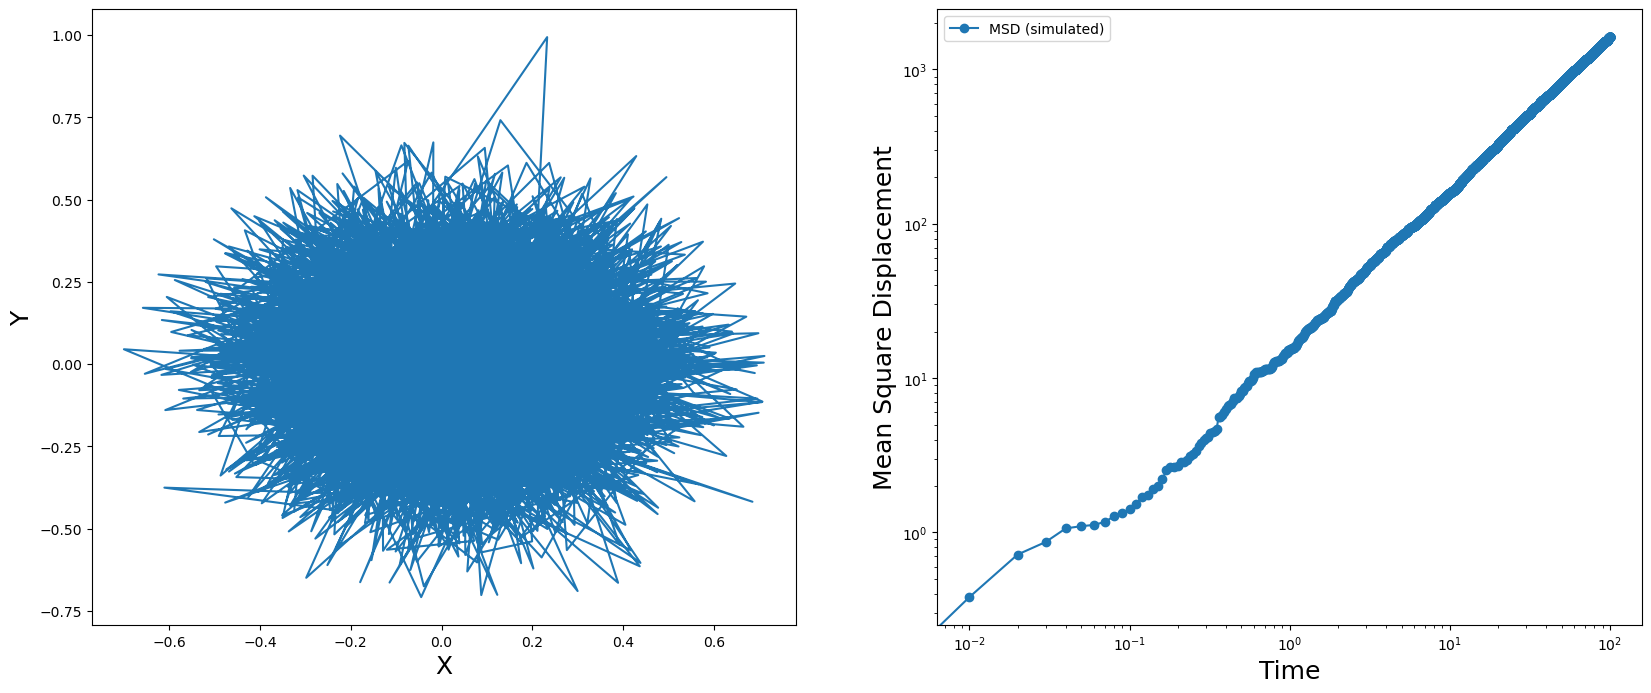

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
ax1.plot(X_disp[:,:1], Y_disp[:,:1], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:,0], label='MSD (simulated)', marker='o')
#ax2.plot(t2, msd_function2D(t2, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize = 18)
ax2.set_xlabel("Time", fontsize = 18)
ax1.set_ylabel("Y", fontsize = 18)
ax2.set_ylabel("Mean Square Displacement", fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.legend()
plt.show()